<a href="https://colab.research.google.com/github/magicv711/ERP-Ball-Mapper-Analysis-of-Structural-Dynamics-in-the-UK-Housing-Market/blob/main/ERP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.dates as mdates

In [ ]:
df_price_raw = pd.read_csv("/content/house price data.csv")

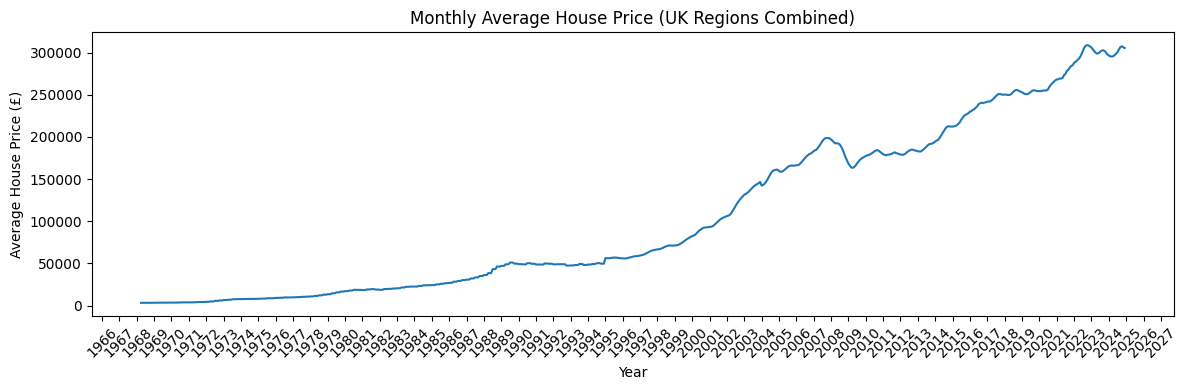

In [ ]:


df_price_raw['Date'] = pd.to_datetime(df_price_raw['Date'], dayfirst=True)
df_price_raw = df_price_raw.sort_values('Date')


monthly_trend = df_price_raw.groupby('Date')['AveragePrice'].mean()

plt.figure(figsize=(12, 4))
plt.plot(monthly_trend)

plt.title('Monthly Average House Price (UK Regions Combined)')
plt.xlabel('Year')
plt.ylabel('Average House Price (£)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

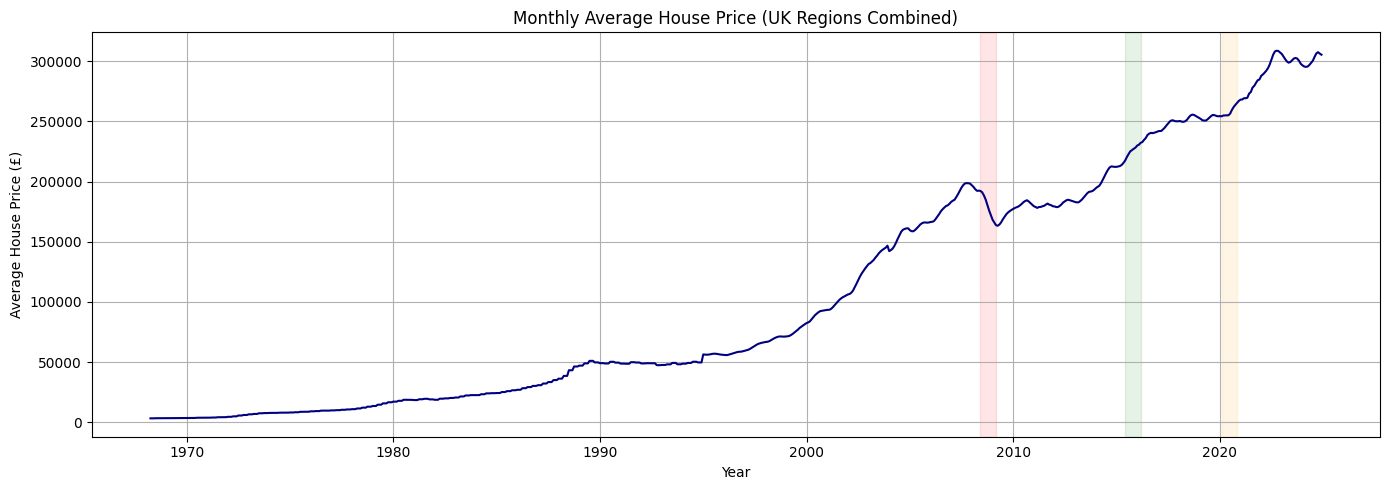

In [ ]:
# Convert date column and sort
df_price_raw['Date'] = pd.to_datetime(df_price_raw['Date'], dayfirst=True)
df_price_raw = df_price_raw.sort_values('Date')

# Aggregate monthly average price
monthly_trend = df_price_raw.groupby('Date')['AveragePrice'].mean()

# Plot monthly trend
plt.figure(figsize=(14, 5))
plt.plot(monthly_trend.index, monthly_trend.values, label='Average House Price', color='navy')

# Highlight event periods
plt.axvspan(pd.to_datetime('2008-06-01'), pd.to_datetime('2009-03-01'), color='red', alpha=0.1)
plt.axvspan(pd.to_datetime('2015-06-01'), pd.to_datetime('2016-03-01'), color='green', alpha=0.1)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-11-01'), color='orange', alpha=0.1)

# Formatting
plt.title("Monthly Average House Price (UK Regions Combined)")
plt.xlabel("Year")
plt.ylabel("Average House Price (£)")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-3605069103.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy['YoY'] = yoy[col].pct_change(periods=12).rolling(window=6, min_periods=1).mean()
/tmp/ipython-input-5-3605069103.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy['YoY'] = yoy[col].pct_change(periods=12).rolling(window=6, min_periods=1).mean()
/tmp/ipython-input-5-3605069103.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to 

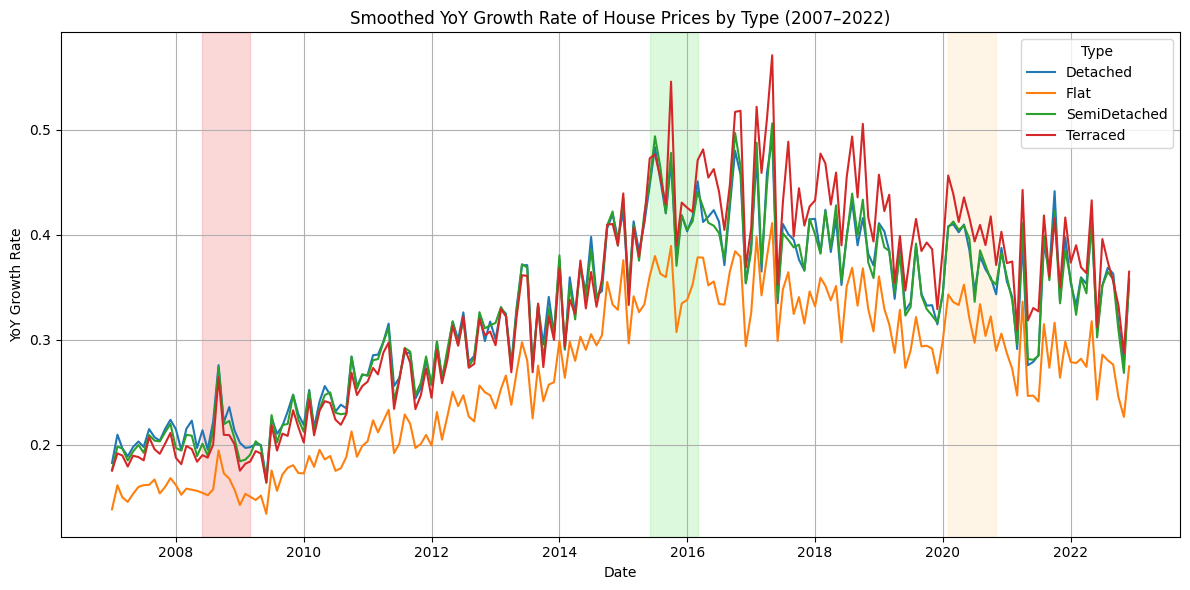

In [ ]:
# Prepare data
df = df_price_raw.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[(df['Date'] >= '2007-01-01') & (df['Date'] <= '2022-12-31')]

# Compute YoY growth (12-month change) and apply rolling smoothing
price_cols = ['DetachedPrice', 'FlatPrice', 'SemiDetachedPrice', 'TerracedPrice']
df_yoy_long = []

for col in price_cols:
    yoy = df[[col, 'Date']].copy()
    yoy['YoY'] = yoy[col].pct_change(periods=12).rolling(window=6, min_periods=1).mean()
    yoy['Type'] = col.replace('Price', '')  # e.g., 'Detached'
    df_yoy_long.append(yoy[['Date', 'YoY', 'Type']])

df_plot = pd.concat(df_yoy_long).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='Date', y='YoY', hue='Type', ci=None)

# Highlight event periods
event_periods = [
    ('2008-06', '2009-03', 'lightcoral'),
    ('2015-06', '2016-03', 'lightgreen'),
    ('2020-02', '2020-11', 'navajowhite')
]
for start, end, color in event_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)

# Formatting
plt.title('Smoothed YoY Growth Rate of House Prices by Type (2007–2022)')
plt.xlabel('Date')
plt.ylabel('YoY Growth Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
58371,2007-01-01,Hertsmere,E07000098,293578,51.7,NaN,-0.4,7.4,NaN,175.0,...,321828.0,57.1,-0.4,5.1,3.0,285094.0,50.1,-0.4,7.7,172.0
83157,2007-01-01,North East Lincolnshire,E06000012,106283,74.1,NaN,1.9,10.9,NaN,302.0,...,135114.0,70.9,2.2,8.1,17.0,105080.0,73.8,1.9,11.0,285.0
34920,2007-01-01,Dover,E07000108,172050,57.0,NaN,-1.7,7.5,NaN,190.0,...,276291.0,59.0,-1.7,4.3,7.0,167196.0,56.5,-1.7,7.7,183.0
111729,2007-01-01,Southwark,E09000028,298862,50.2,NaN,-1.5,14.8,NaN,348.0,...,319158.0,52.1,-1.5,12.0,35.0,294383.0,49.5,-1.5,15.2,313.0
25428,2007-01-01,City of Glasgow,S12000049,115360,69.0,NaN,-0.6,10.6,NaN,1155.0,...,163145.0,65.3,-0.4,7.9,166.0,110948.0,69.0,-0.6,11.4,989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23171,2022-12-01,Chesterfield,E07000034,193513,100.2,NaN,0.0,8.6,NaN,173.0,...,390462.0,98.6,0.1,8.4,29.0,187286.0,100.3,0.0,8.6,144.0
130814,2022-12-01,Warwick,E07000222,349181,99.8,NaN,-0.5,8.1,NaN,241.0,...,430962.0,98.1,-0.5,8.0,61.0,344414.0,99.9,-0.5,8.1,180.0
107027,2022-12-01,South Hams,E07000044,400339,103.5,NaN,0.6,8.1,NaN,156.0,...,406434.0,101.8,0.8,8.5,36.0,399571.0,103.6,0.6,8.1,120.0
8891,2022-12-01,Blaenau Gwent,W06000019,134093,99.7,NaN,0.9,17.1,NaN,93.0,...,166007.0,98.0,1.0,16.1,17.0,133423.0,99.7,0.9,17.2,76.0


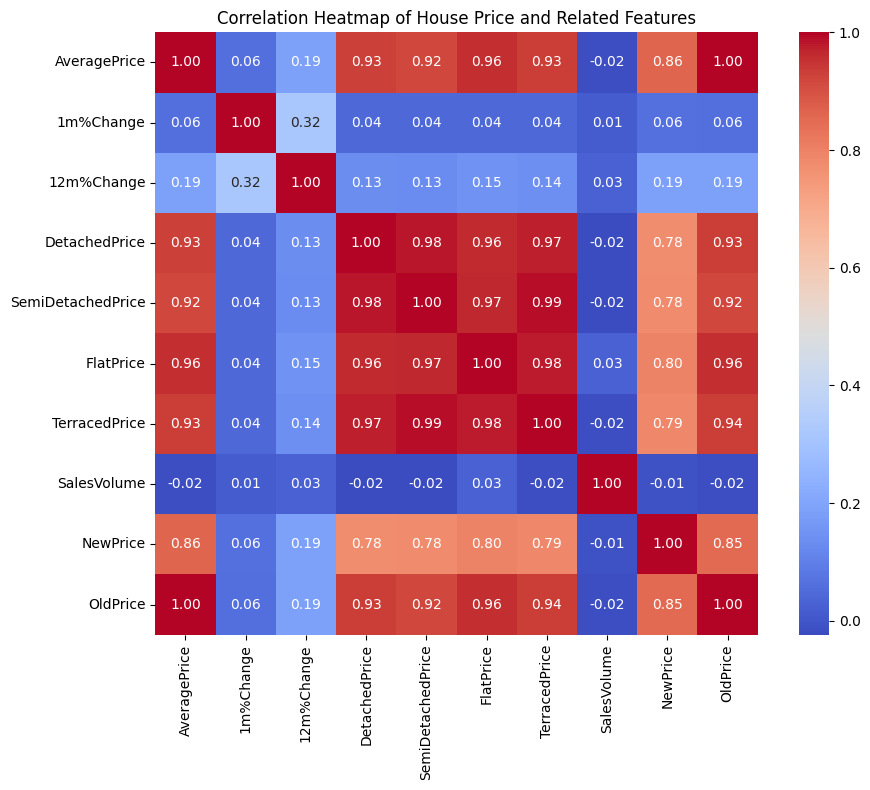

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['AveragePrice', '1m%Change',
       '12m%Change','DetachedPrice', 'SemiDetachedPrice', 'FlatPrice', 'TerracedPrice', 'SalesVolume',   'NewPrice',
       'OldPrice']
df_corr = df[cols].apply(pd.to_numeric, errors='coerce').dropna()
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of House Price and Related Features")
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv('/content/data_bm.csv')

In [ ]:
df

,RegionName,AreaCode,Year,AveragePrice,1m%Change,12m%Change,SalesVolume,SemiDetachedPrice,NewPrice,OldPrice,...,UnemploymentRate_16_64,UnemploymentRate_16plus,Inactive_WantJob,Inactive_NoJob,Population,TotalArea,PeoplePerSqKm,Crisis_0809_Diff,Stable_1516_Diff,Covid_2020_Diff
0,Aberdeenshire,S12000034,2007,167845.2,1.8,27.6,516.7,145561.5,218891.5,161613.5,...,2.1,2,23,77,NaN,NaN,NaN,-13628,-2218,7645
1,Aberdeenshire,S12000034,2008,179441.2,0.1,7.5,383.3,157182.4,236504.0,172388.3,...,2.7,2.7,33.2,66.8,NaN,NaN,NaN,-13628,-2218,7645
2,Aberdeenshire,S12000034,2014,199781.1,0.7,7.6,486.0,174790.7,269926.8,191773.1,...,4,3.9,28.7,71.3,NaN,NaN,NaN,-13628,-2218,7645
3,Aberdeenshire,S12000034,2015,207355.6,-0.1,4.0,424.8,181954.9,279709.8,199095.9,...,2.4,2.3,35.8,64.2,NaN,NaN,NaN,-13628,-2218,7645
4,Aberdeenshire,S12000034,2019,190988.8,-0.2,-2.5,339.8,168766.4,267031.5,182920.0,...,2.7,2.7,23,77,NaN,NaN,NaN,-13628,-2218,7645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,York,E06000014,2008,183766.2,-1.2,-5.0,189.0,188301.8,196204.0,182342.5,...,4.2,4.1,13.5,86.5,716.527514,271.98816,2.634407,-25242,13341,10448
2072,York,E06000014,2014,199576.1,0.6,6.7,313.5,206556.7,211568.8,198679.1,...,4.1,4,20.6,79.4,202206.000000,271.93580,743.579918,-25242,13341,10448
2073,York,E06000014,2015,214080.6,0.5,7.3,294.3,221795.5,228076.8,212991.0,...,4.3,4.3,23.7,76.3,203212.000000,271.93580,747.279321,-25242,13341,10448
2074,York,E06000014,2019,248339.8,0.0,2.6,270.0,260652.6,272745.3,247236.1,...,2.6,2.6,14.2,85.8,203877.000000,271.93580,749.724751,-25242,13341,10448


In [ ]:
df.dtypes


,0
RegionName,object
AreaCode,object
Year,int64
AveragePrice,float64
1m%Change,float64
12m%Change,float64
SalesVolume,float64
SemiDetachedPrice,float64
NewPrice,float64
OldPrice,float64


In [ ]:
cols = [
    'Income',
    'EmploymentRate_16_64', 'SelfEmployed_16_64',
    'Inactive_WantJob',
    'Population', 'PeoplePerSqKm'
]

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
df[cols].describe().round(2)

,Income,EmploymentRate_16_64,SelfEmployed_16_64,Inactive_WantJob,Population,PeoplePerSqKm
count,2076.00,2075.00,2070.00,1981.00,1836.00,1836.00
mean,19144.19,74.69,10.13,24.09,124407.16,1231.97
std,5657.33,5.48,3.41,7.48,130003.56,2234.73
min,10537.00,55.50,2.40,6.20,25.28,0.00
25%,15599.50,71.10,7.60,19.10,2590.99,39.96
50%,18097.00,74.90,9.70,23.60,107190.00,308.39
75%,21519.75,78.60,12.10,28.30,174979.00,1414.05
max,82283.00,100.00,26.90,61.50,1150646.00,15524.44


In [ ]:
df[[
    'Income', 'EconActiveRate_16_64', 'EmploymentRate_16_64',
    'Employees_16_64', 'SelfEmployed_16_64', 'UnemploymentRate_16_64',
    'UnemploymentRate_16plus', 'Inactive_WantJob', 'Inactive_NoJob',
    'Population', 'TotalArea', 'PeoplePerSqKm'
]].isnull().sum()


,0
Income,0
EconActiveRate_16_64,0
EmploymentRate_16_64,0
Employees_16_64,0
SelfEmployed_16_64,0
UnemploymentRate_16_64,0
UnemploymentRate_16plus,0
Inactive_WantJob,0
Inactive_NoJob,0
Population,240


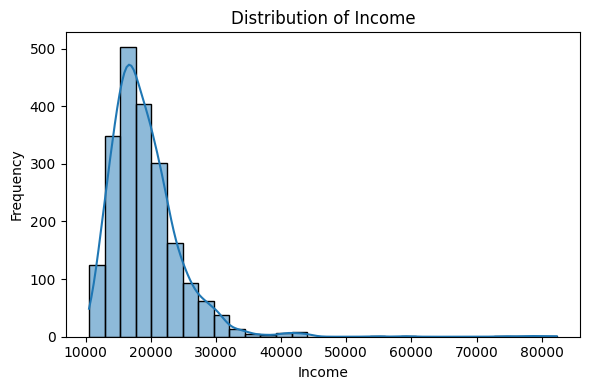

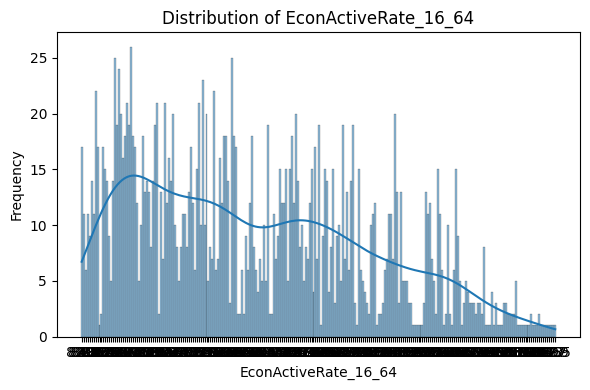

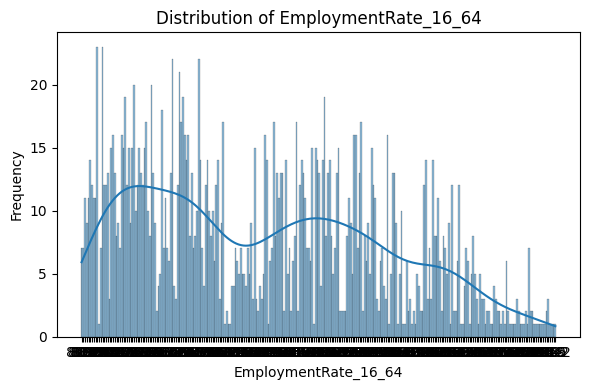

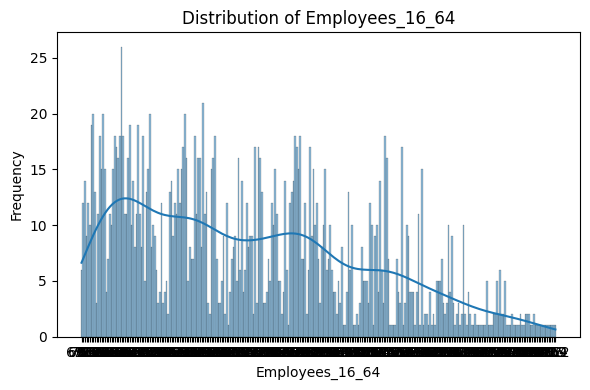

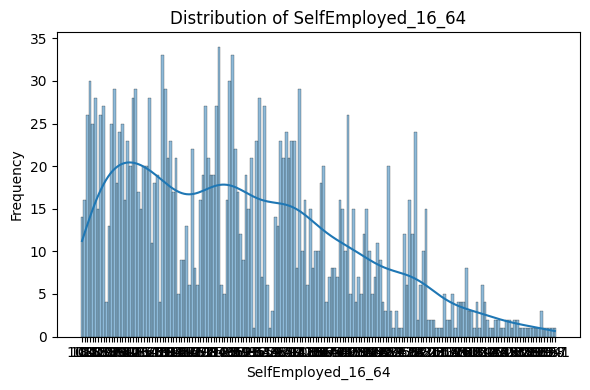

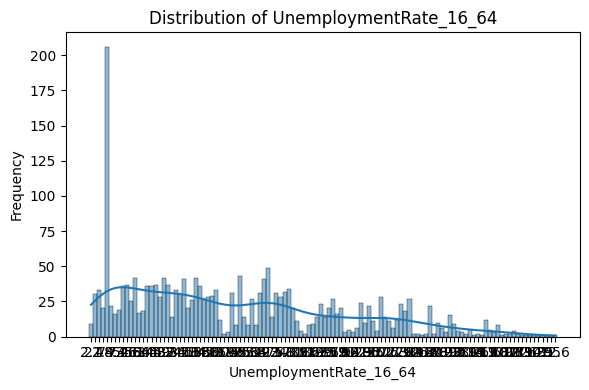

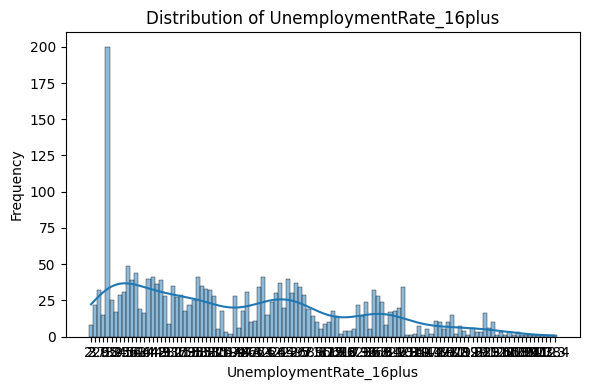

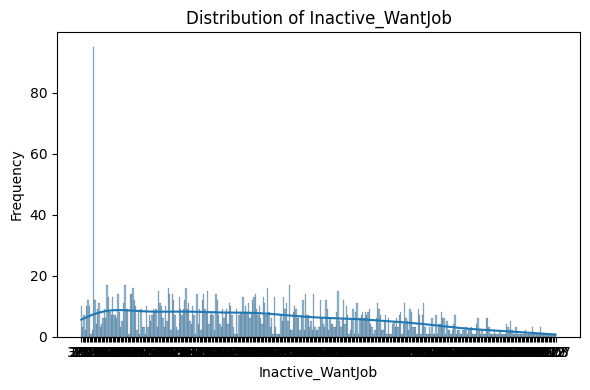

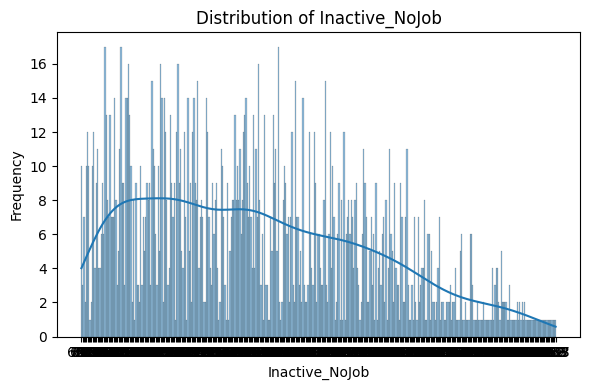

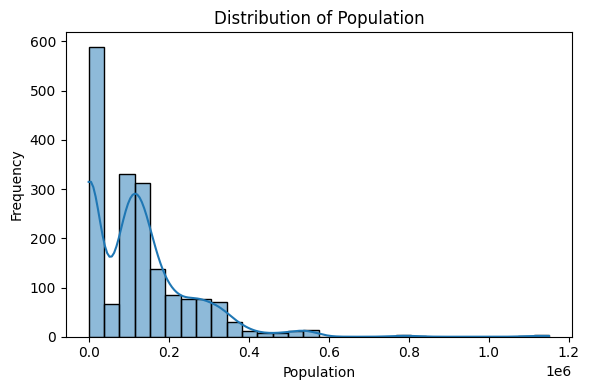

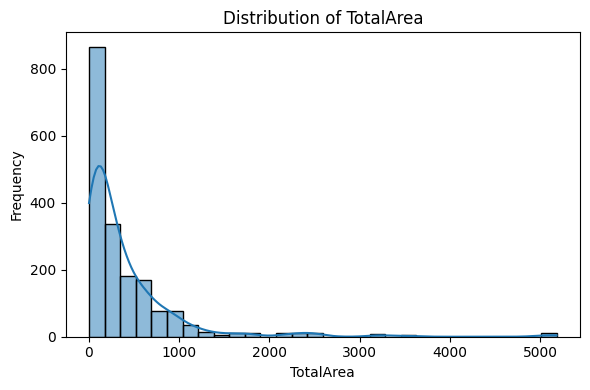

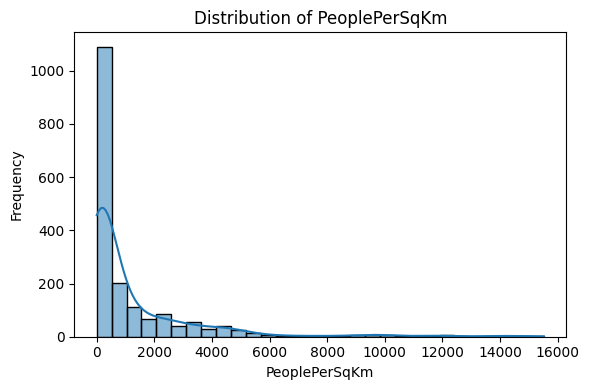

In [ ]:
cols = [
'Income', 'EconActiveRate_16_64', 'EmploymentRate_16_64',
    'Employees_16_64', 'SelfEmployed_16_64', 'UnemploymentRate_16_64',
    'UnemploymentRate_16plus', 'Inactive_WantJob', 'Inactive_NoJob',
    'Population', 'TotalArea', 'PeoplePerSqKm'
]

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
